In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

#from simpleplot import *
#from radmc3dPy import image
#from gizmopy.load_from_snapshot import load_from_snapshot
#from gizmopy.load_fire_snap import load_fire_snap
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'


params = {"text.color" : 'w',
          "ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
'''
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}

'''
plt.rcParams.update(params)



/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


"\nplt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )\n#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)\nbartxt = r'%d kpc' % np.round(bar_size).astype(int)\nplt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},\n        horizontalalignment='center', verticalalignment='bottom' )\nplt.tight_layout()\nplt.show()\n"

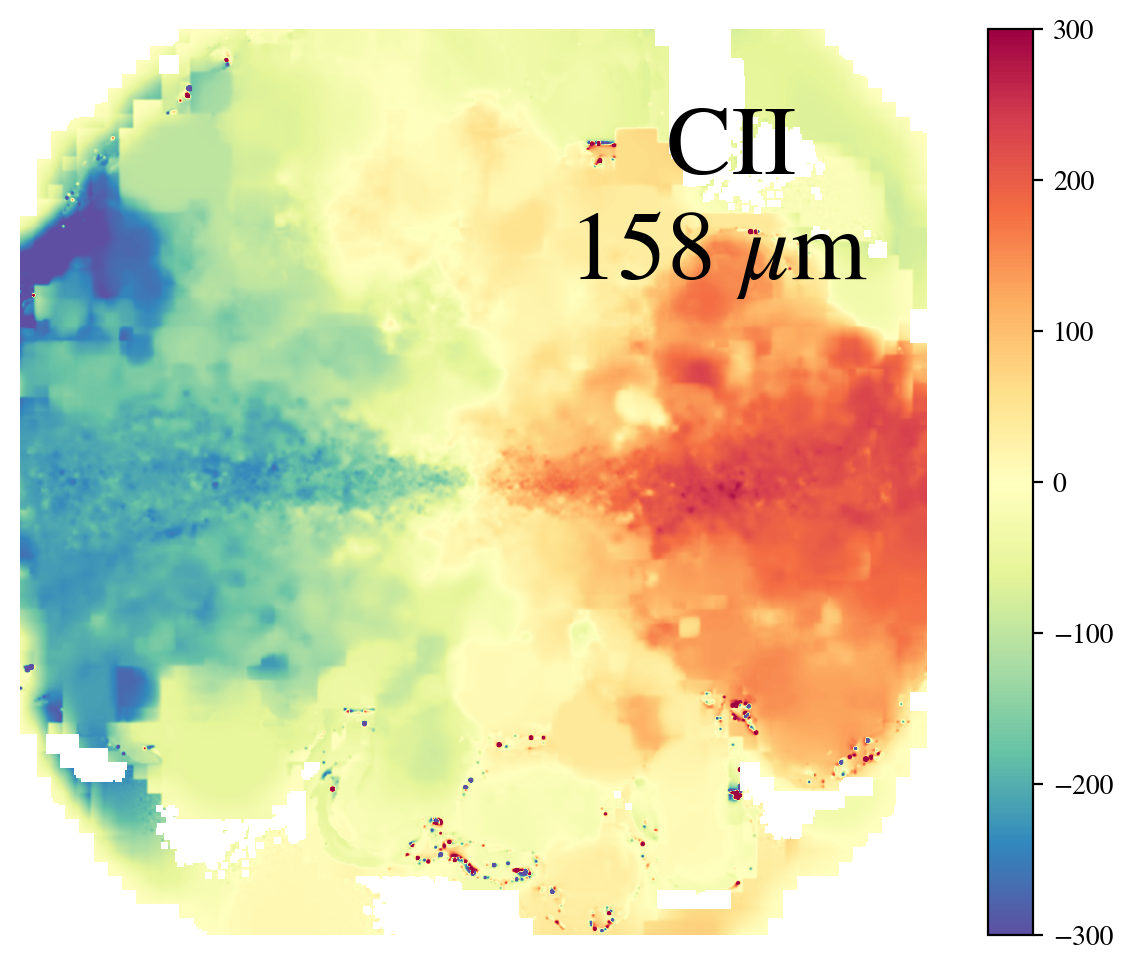

In [13]:
#for generalization, see "#change" throughout code on lines where needs change depending on emission line instance. (ctrl+f to find and change quickly)

parent = '/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/CII/edge-on/' #change 

filepath_tot = parent + 'image_tot.hdf5'
filepath_con = parent + 'image_continuum.hdf5'
'''
file = h5.File(filepath_tot,'r')
#file = h5.File('/mnt/home/nroy/radmc3d-2.0/run/subtract_comvel/A4_33000_snum152/image_tot.hdf5','r')
#npix_x = int(file['pix_size_x'][()])
#npix_y = int(file['pix_size_y'][()])
npix_x = np.shape(file['image_array'][:])[0]
npix_y = np.shape(file['image_array'][:])[1]

image_array = file['image_array'][:]
frequency_array = 3e8 / (file['lambda_array'][:] * 1e-6)
'''

file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

#file = h5.File('/mnt/home/nroy/radmc3d-2.0/run/subtract_comvel/A4_33000_snum152/image_tot.hdf5','r')
#npix_x = int(file['pix_size_x'][()])
#npix_y = int(file['pix_size_y'][()])
npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]
frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)
N = np.size(frequency_array)
velocity_arr = np.linspace(-1000, 1000, N)
moment1_noint = velocity_arr * image_array

integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0
integrated_image_array_moment1[0,0] = 0
        
velocity = integrated_image_array_moment1 / integrated_image_array_moment0
velocity[0,0] = 0
'''
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array[i, j] /= 
stats.moment(integrated_image_array, moment = 1) ##need to import scipy --> pip install? 
 --> Splits -1000 to 1000 into N equal parts, N is based off of what?
'''
        
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

figx, figy = 8,6

plt.figure(figsize=(figx,figy), dpi=200, facecolor='w')
#integrated_image_array[0,0] = 0
cmap = matplotlib.cm.hot.copy()
low = cmap(0)
cmap.set_bad(color = low)

#plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
plt.imshow(velocity.T, vmin = -300, vmax = 300, extent=(-2,2,-2,2), \
           interpolation='bicubic', cmap='Spectral_r', origin='lower')
plt.xlabel('X (kpc)', fontsize = 14)
plt.ylabel('Y (kpc)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.colorbar(label=r'$I_{\nu}$ / max($I_{\nu}$)')

plt.text(0.1,0.9,r'       CII'
               '\n'
               r'   158 $\mu$m', fontsize = 35)
cb = plt.colorbar() 
#cb.remove()
#plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
#          '\n [-1000,1000] '
#         r'kms$^{-1}$', fontsize=12)
#plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
#          '\n [-500,500] '
#          r'kms$^{-1}$ ', fontsize=12, usetex = True)

plt.axis('off')
dx = 1
yrg = [ -dx, dx ]
bar_size = 1 #dx / 2.
xleft = -1 #-bar_size/2.
#xleft += 0.5*dx
#ybar = yrg[0] + 0.06*dx
ybar= -1.5
colbar = 'white'
'''
plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
bartxt = r'%d kpc' % np.round(bar_size).astype(int)
plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
        horizontalalignment='center', verticalalignment='bottom' )
plt.tight_layout()
plt.show()
'''


In [31]:
np.count_nonzero(velocity), np.size(velocity)

(262143, 262144)

Text(-1050, 0.8, '[$-10^{3},10^{3}$]\n     $km/s$')

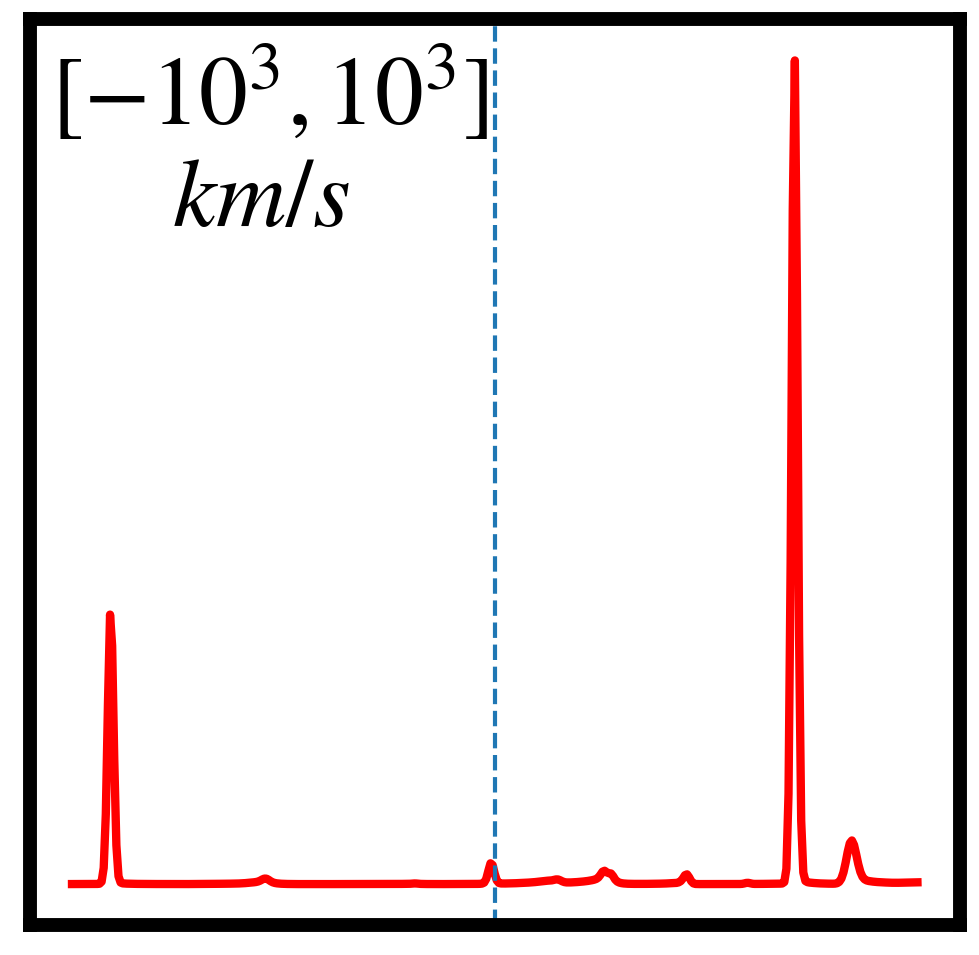

In [19]:
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}

plt.rcParams.update(params)

file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')
spectrum_con = np.zeros(np.size(file_con['lambda_array']))
spectrum_tot = np.zeros(np.size(file_tot['lambda_array']))
spectrum_con_sum = np.zeros(np.size(file_con['lambda_array']))
spectrum_tot_sum = np.zeros(np.size(file_tot['lambda_array']))
vel_array = np.linspace(-1000,1000,np.size(spectrum_con)) #negative is blueshift, positive is redshift
image_con = file_con['image_array'][:]
image_tot = file_tot['image_array'][:]
spectrum_con_sum = image_con.sum(axis=tuple(range(image_con.ndim - 1))) - image_con[0,0,:]
spectrum_tot_sum = image_tot.sum(axis=tuple(range(image_tot.ndim - 1))) - image_con[0,0,:]
spectrum_line_sum = spectrum_tot_sum - spectrum_con_sum





plt.figure(figsize=(6,6),dpi=200, facecolor="w")

#plt.plot(vel_array, spectrum_tot_sum/np.max(spectrum_tot_sum), 'b-' , label='Total')
plt.plot(vel_array, spectrum_line_sum/np.max(spectrum_line_sum), 'r-' , label='Line', linewidth = 3)
plt.axvline(x=0, linestyle='--', label = r'Rest-frame $H_{\alpha}$ (656 nm)')
#plt.legend()
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 5
plt.xticks([],fontsize=11, rotation = 0, color = 'k')
plt.yticks([],fontsize=15, color = 'k')
plt.text(-1050,0.8,r'[$-10^{3},10^{3}$]''\n'r'     $km/s$', fontsize = 35, color='k')

#plt.subplots_adjust(top = 1, bottom = 1, right = 1, left = 0, 
#            hspace = 0, wspace = 0)

#plt.xlabel(r'$\lambda$ ($\mu$m)', fontsize=18)
#plt.xlabel(r'$\Delta$v (km$s^{-1}$)', fontsize=16, color ='k')
#plt.ylabel(r'$I_{\nu}$ / max($I_{\nu}$)', fontsize=18)
#plt.title(r'Spatially integrated NII spectra of A4 at -50 Myr', fontsize=15)
#plt.legend(fontsize = 13)
#plt.axis('off')


In [15]:
import numpy as np 
import sys
import struct 
import matplotlib.pyplot as plt
import math
import matplotlib 
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

###### reading the LUMINOSITY file and saving data      
        
with open((parent + 'lum_A4snap152_CII_158mu.binp'), mode='rb') as f_lum: #change
    fileContent_lum = f_lum.read()
    
header = struct.unpack("l", fileContent_lum[0:8])
lum_arr = []

for i in range(8, len(fileContent_lum),8):
    lum_arr.append(struct.unpack("d", fileContent_lum[i:i+8]))

print('Size of luminosity array = {}'.format(np.size(lum_arr)))
        
        
###### reading the NUMBER DENSITY file and saving data      
        
with open((parent + 'gas_nHtot.binp'), mode='rb') as f_nHtot: 
    fileContent_nHtot = f_nHtot.read()
    
header = struct.unpack("3l", fileContent_nHtot[0:24])
nHtot_arr = []

for i in range(24, len(fileContent_nHtot),8):
    #print(struct.unpack("d", fileContent[i:i+8]))
    nHtot_arr.append(struct.unpack("d", fileContent_nHtot[i:i+8]))

print('Size of nHtot_arr array = {}'.format(np.size(nHtot_arr)))
   

    
###### reading the TEMPERATURE file and saving data 

with open((parent + 'gas_temperature.binp'), mode='rb') as f_temp: 
    fileContent_temp = f_temp.read()
    
header = struct.unpack("3l", fileContent_temp[0:24])
temp_arr = []

for i in range(24, len(fileContent_temp),8):
    #print(struct.unpack("d", fileContent[i:i+8]))
    temp_arr.append(struct.unpack("d", fileContent_temp[i:i+8]))

print('Size of temp array = {}'.format(np.size(temp_arr)))



###### reading the VOLUME file and saving data 

with open((parent + '/vol_A4snap152_CII_158mu.binp'), mode='rb') as f_vol: # b is important -> binary #change
    fileContent_vol = f_vol.read()
    
header = struct.unpack("l", fileContent_vol[0:8])
vol_arr = []

for i in range(8, len(fileContent_vol),8):
    #print(struct.unpack("d", fileContent[i:i+8]))
    vol_arr.append(struct.unpack("d", fileContent_vol[i:i+8]))
    


    
###### reading the DENSITY file and saving data 

with open((parent + '/numberdens_NII.binp'), mode='rb') as f_temp: #change
    fileContent_numberdens = f_temp.read()
    
header = struct.unpack("3l", fileContent_numberdens[0:24]) 
numberdens_arr = []

for i in range(24, len(fileContent_numberdens),8):
    #print(struct.unpack("d", fileContent[i:i+8]))
    numberdens_arr.append(struct.unpack("d", fileContent_numberdens[i:i+8]))

print('Size of numberdens_arr array = {}'.format(np.size(numberdens_arr))) 



vol_arr = np.asarray(vol_arr)[:,0]
nHtot_arr = np.asarray(nHtot_arr)[:,0] 
temp_arr = np.asarray(temp_arr)[:,0]
lum_arr = np.asarray(lum_arr)[:,0]
proton_mass_cgs = 1.672621898e-24
mass_arr = vol_arr * nHtot_arr * proton_mass_cgs / 1.989e+33 #converting to Msun 
numberdens_arr = np.asarray(numberdens_arr)[:,0] 
mass_arr = mass_arr * numberdens_arr
log_nHtot_arr = np.where( np.isinf(np.log10(nHtot_arr)), 0, np.log10(nHtot_arr) )
log_temp_arr = np.where( np.isinf(np.log10(temp_arr)), 0, np.log10(temp_arr) )


FileNotFoundError: [Errno 2] No such file or directory: './lum_A4snap152_CII_158mu.binp'

/tmp/ipykernel_3929410/1676649181.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(hist).T, origin='lower', cmap = cmap,\


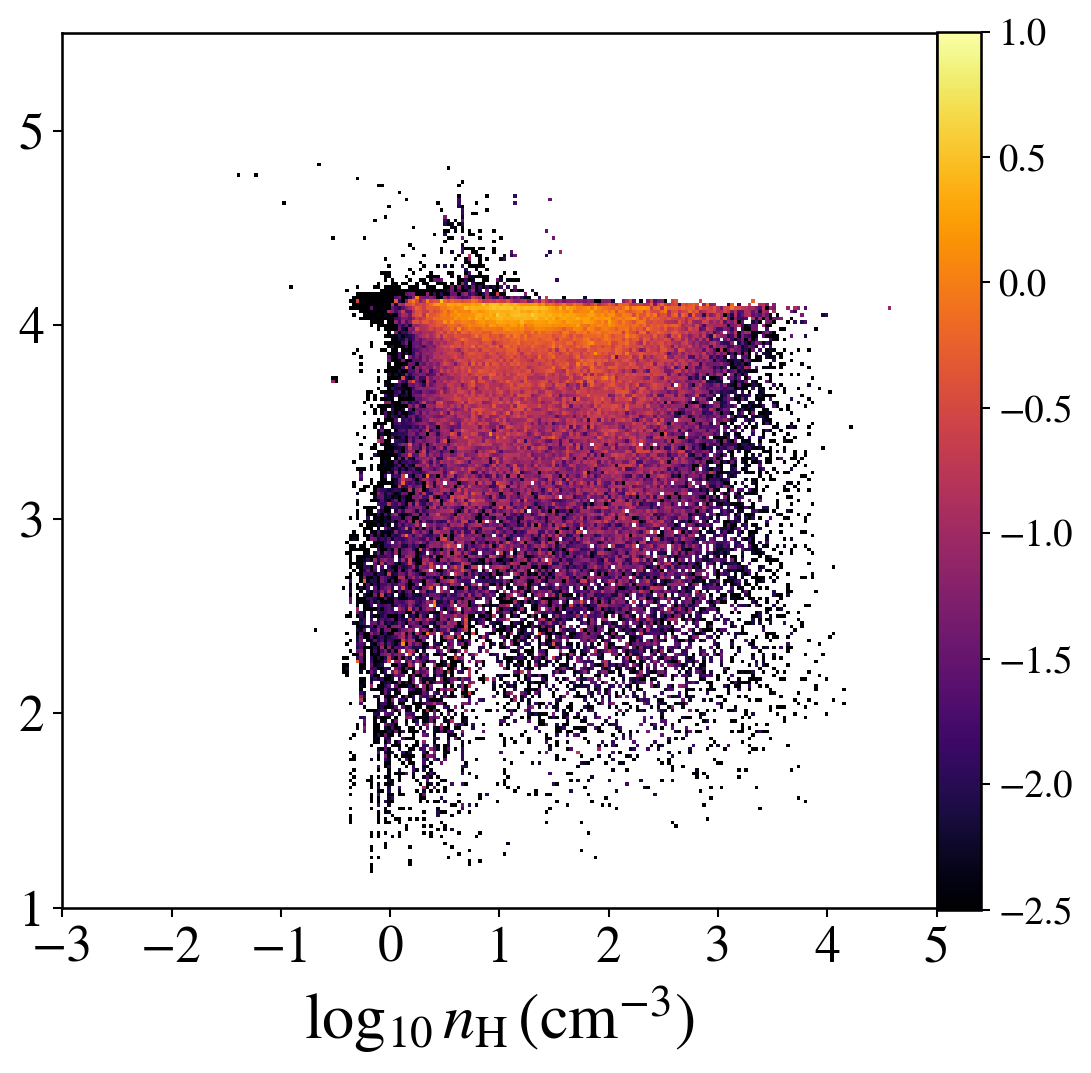

In [22]:
bins = 250
del_T = (np.max(log_temp_arr) - np.min(log_temp_arr)) / bins
del_nH = (np.max(log_nHtot_arr) - np.min(log_nHtot_arr)) / bins

xmin = -3 #np.min(log_nH_arr) #
xmax = 5 # np.max(log_nH_arr) #
ymin = 1 # np.min(log_temp_arr) #
ymax = 5.5 #np.max(log_temp_arr) #

del_T = (ymax-ymin) / bins
del_nH = (xmax-xmin) / bins


hist, xedges, yedges = np.histogram2d(log_nHtot_arr, log_temp_arr, bins = bins, \
                                      weights=lum_arr, range = [[xmin, xmax], [ymin, ymax]])

#hist = hist/(np.sum(mass_arr) * del_T * del_nH)
hist = hist/(np.sum(lum_arr) * del_T * del_nH)
hist = np.ma.masked_where(hist < 1e-4, hist)
#log_hist = np.log10(hist)

cmap = matplotlib.cm.inferno.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(6,6), dpi = 185, facecolor = 'w')
plt.imshow(np.log10(hist).T, origin='lower', cmap = cmap,\
          aspect = 1 *(del_nH/del_T) , \
           extent = [xmin,xmax,ymin,ymax], vmax = 1, vmin = -2.5)

         #extent=[np.min(log_nH_CII_arr), np.max(log_nH_CII_arr), np.min(log_temp_arr), np.max(log_temp_arr)],)
plt.rcParams["axes.linewidth"] = 1 
plt.xlabel(r'$\mathrm{log}_{10} \, n_{\mathrm{H}}\, (\mathrm{cm}^{-3})$', fontsize = 25)
#plt.ylabel(r'$\mathrm{log}_{10} \, T\, (\mathrm{K})$', fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks([1,2,3,4,5],fontsize=20)
cbar = plt.colorbar(orientation = 'vertical', fraction=0.0478, pad=0.0, \
             aspect=20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_label(label = r'$\mathrm{log}\left(\frac{L_{\mathrm{bin}}/L_{\mathrm{total}}}{\Delta \mathrm{log}\, T(\mathrm{K}) \times \Delta \mathrm{log} \, n_{\mathrm{H}} (\mathrm{cm}^{-3})}\right)$',\
#               size = 25)
#plt.colorbar(orientation = 'horizontal', fraction=0.04, pad=0.15, \
#             aspect=20, label = r'$log\left(\frac{M_{gas}(M_{\odot})}{\Delta log T(K) * \Delta log nH (cm^{-3})}\right)$')

#plt.title(r'T vs $\rho$ (CII weighted) diagram of m12i from AMR data', fontsize = 10)
#plt.savefig('PhasePlot_MassWeighted.png')
plt.tight_layout()
plt.show()
#plt.savefig('gas_phase_CII.pdf')



non-zero elements in hist = 18031


/tmp/ipykernel_3929410/137275719.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(hist).T, origin='lower', cmap = cmap,\


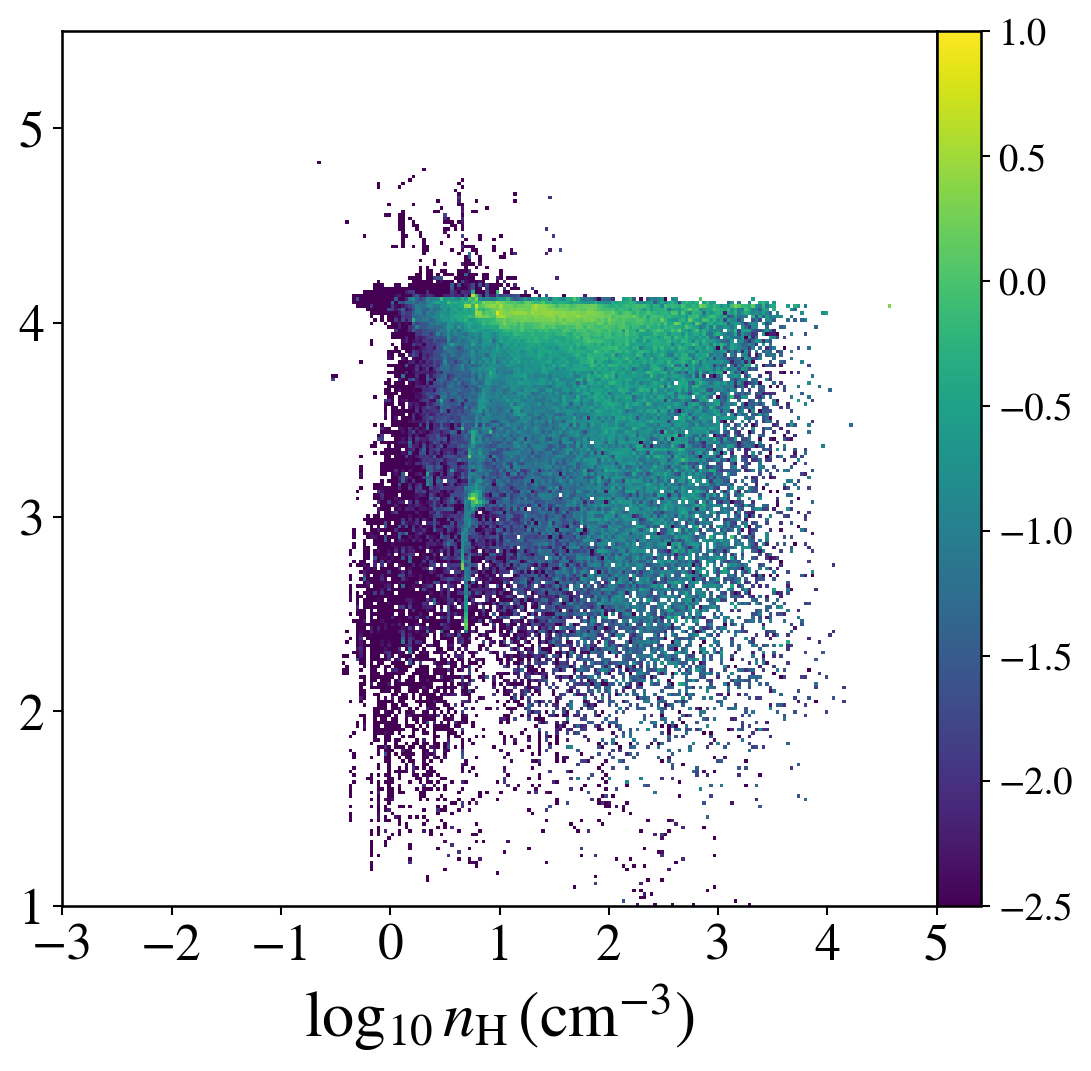

In [23]:

bins = 250
#del_T = (np.max(log_temp_arr) - np.min(log_temp_arr)) / bins
#del_nH = (np.max(log_nHtot_CII_arr) - np.min(log_nHtot_CII_arr)) / bins

xmin = -3 #np.min(log_nHtot_arr) #
xmax = 5 #np.max(log_nHtot_arr) #
ymin = 1 #np.min(log_temp_arr) #
ymax = 5.5 #np.max(log_temp_arr) #

del_T = (ymax-ymin) / bins
del_nH = (xmax-xmin) / bins


hist, xedges, yedges = np.histogram2d(log_nHtot_arr, log_temp_arr, bins = bins, \
                                      weights=numberdens_arr, range = [[xmin, xmax], [ymin, ymax]])

#hist = hist/(np.sum(mass_arr) * del_T * del_nH)
hist = hist/(np.sum(numberdens_arr) * del_T * del_nH)
hist = np.ma.masked_where(hist < 1e-4, hist)
#log_hist = np.log10(hist)
print('non-zero elements in hist = {}'.format(np.count_nonzero(hist)))
cmap = matplotlib.cm.viridis.copy()
#cmap.set_bad(color='white')

plt.figure(figsize=(6,6), dpi = 185, facecolor = 'w')
plt.imshow(np.log10(hist).T, origin='lower', cmap = cmap,\
          aspect = 1 *(del_nH/del_T), \
        extent = [xmin,xmax,ymin,ymax], vmin = -2.5, vmax = 1)#, vmax = 3, vmin = -2.5)

         #extent=[np.min(log_nH_CII_arr), np.max(log_nH_CII_arr), np.min(log_temp_arr), np.max(log_temp_arr)],)
    
plt.xlabel(r'$\mathrm{log}_{10} \, n_{\mathrm{H}}\, (\mathrm{cm}^{-3})$', fontsize = 25)
#plt.ylabel(r'$\mathrm{log}_{10} \, T\, (\mathrm{K})$', fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks([1,2,3,4,5],fontsize=20)
cbar = plt.colorbar(orientation = 'vertical', fraction=0.0476, pad=0.0, \
             aspect=20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_label(label = r'$\mathrm{log}\left(\frac{n_{\mathrm{H_{CII-bin}}}/n_{\mathrm{H_{CII-total}}}}{\Delta \mathrm{log}\, T(\mathrm{K}) \times \Delta \mathrm{log} \, n_{\mathrm{H}} (\mathrm{cm}^{-3})}\right)$',\
#               size = 25)
#plt.colorbar(orientation = 'horizontal', fraction=0.04, pad=0.15, \
#             aspect=20, label = r'$log\left(\frac{M_{gas}(M_{\odot})}{\Delta log T(K) * \Delta log nH (cm^{-3})}\right)$')

#plt.title(r'T vs $\rho$ (CII weighted) diagram of m12i from AMR data', fontsize = 10)
#plt.savefig('PhasePlot_MassWeighted.png')
plt.tight_layout()
plt.show()
#plt.savefig('gas_phase_CII.pdf')

